In [19]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [20]:
# Webscrapping Wikipedia table to get the CAC40 components
page = requests.get("https://en.wikipedia.org/wiki/CAC_40")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='constituents',class_="wikitable sortable")

In [21]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA
6,Bouygues,Industrials,Construction & Engineering,EN.PA
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA


In [22]:
# Get the data for the stock ^IBEX
cac40_list = wiki['Ticker'].tolist()
cac40_list.append('^FCHI')

In [23]:
# Save all the historical data
for stock in tqdm(cac40_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

100%|██████████| 41/41 [00:15<00:00,  2.68it/s]


In [24]:
# Configuration of different parameters of the notebook
ticker = '^FCHI'
year = '2024'

In [25]:
# Check DataFrame
stock_cac = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_cac.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-03-01,1836.0,1838.0,1827.0,1832.0,1832.0,0
1990-03-02,1831.0,1860.0,1831.0,1860.0,1860.0,0
1990-03-05,1866.0,1874.0,1862.0,1874.0,1874.0,0
1990-03-06,1869.0,1875.0,1866.0,1872.0,1872.0,0
1990-03-07,1874.0,1881.0,1874.0,1880.0,1880.0,0
1990-03-08,1891.0,1923.0,1891.0,1917.0,1917.0,0
1990-03-09,1936.0,1941.0,1921.0,1921.0,1921.0,0
1990-03-12,1917.0,1918.0,1912.0,1912.0,1912.0,0
1990-03-13,1924.0,1924.0,1924.0,1924.0,1924.0,0


In [26]:
# Check DataFrame tail
stock_cac.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-17,7313.259766,7323.250000,7281.100098,7318.689941,7318.689941,59431200
2024-01-18,7346.709961,7409.640137,7326.450195,7401.350098,7401.350098,51151100
2024-01-19,7446.819824,7446.819824,7350.680176,7371.640137,7371.640137,51572100
2024-01-22,7436.609863,7453.209961,7390.680176,7413.250000,7413.250000,47900000
2024-01-23,7449.379883,7449.379883,7373.220215,7388.040039,7388.040039,50061200
2024-01-24,7414.759766,7466.919922,7403.870117,7455.640137,7455.640137,58529300
2024-01-25,7448.049805,7466.270020,7410.890137,7464.200195,7464.200195,48432800
2024-01-26,7555.049805,7645.740234,7553.649902,7634.140137,7634.140137,67454400
2024-01-29,7643.040039,7649.189941,7620.529785,7640.810059,7640.810059,55590300


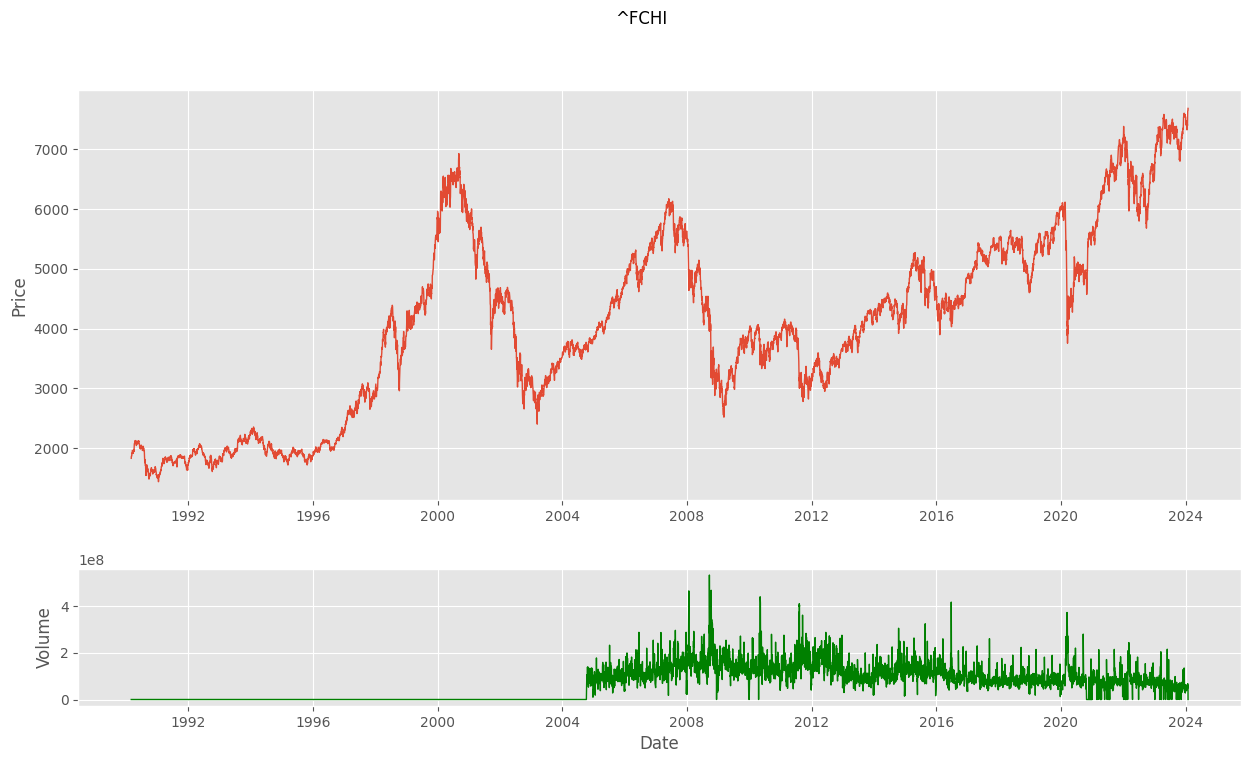

In [27]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_cac['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_cac['Volume'],linewidth=1,color='g')

plt.show()

In [28]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_cac.index,y=stock_cac['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_cac.index,y=stock_cac['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [29]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_cac['MMA20'] = stock_cac['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_cac["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_cac['BB_Upper'] = indicator_bb.bollinger_hband()
stock_cac['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_cac["Adj Close"].loc[year], window=14)

# RSI
stock_cac['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_cac['Daily_Return'] = daily_return(stock_cac["Adj Close"].loc[year])

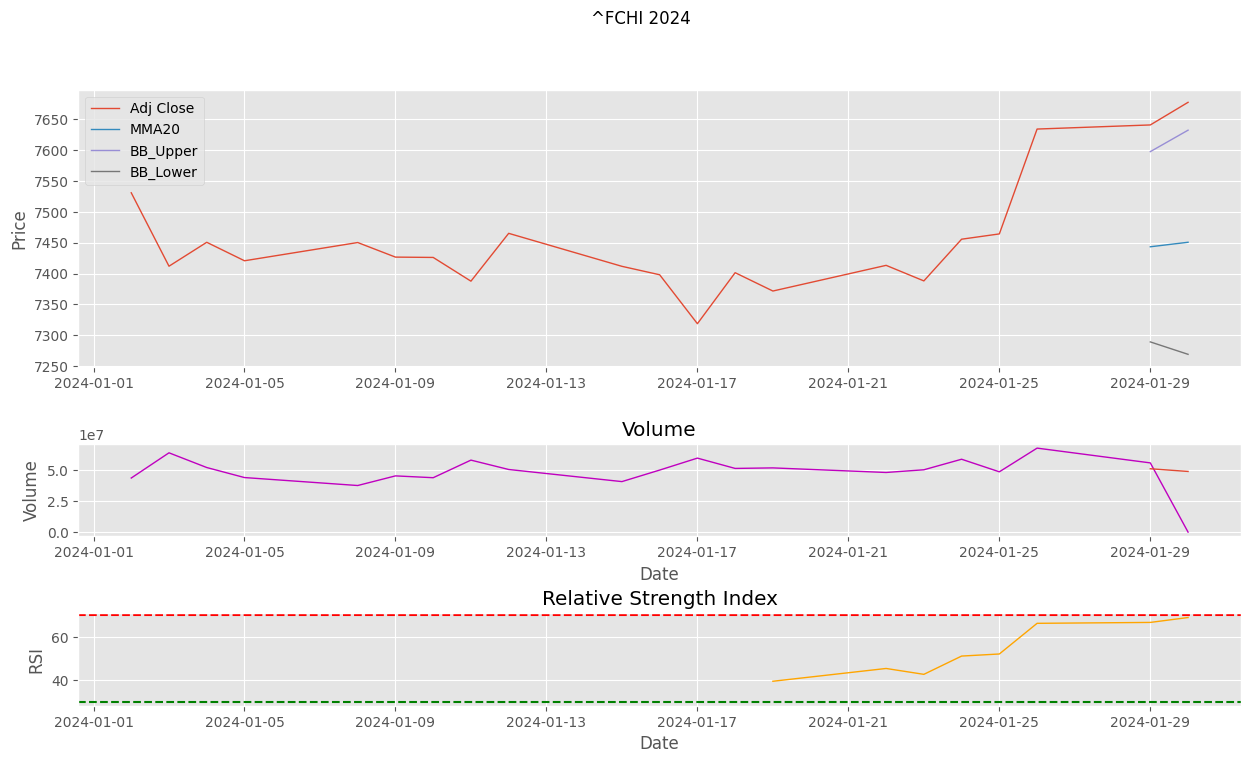

In [30]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_cac['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_cac['MMA20'],linewidth=1) 
axs[0].plot(stock_cac['BB_Upper'],linewidth=1)
axs[0].plot(stock_cac['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_cac['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_cac['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_cac['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [31]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_cac['Adj Close'].loc[year].index,y=stock_cac['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_cac['BB_Lower'].loc[year].index,y=stock_cac['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_cac['BB_Upper'].loc[year].index,y=stock_cac['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_cac['MMA20'].loc[year].index,y=stock_cac['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_cac['Volume'].loc[year].index,y=stock_cac['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_cac['Volume'].loc[year].index,y=stock_cac['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_cac['RSI'].loc[year].index,y=stock_cac['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [32]:
stock_cac.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-01-17,7313.259766,7323.250000,7281.100098,7318.689941,7318.689941,59431200,NaN,NaN,NaN,NaN,-1.072047
2024-01-18,7346.709961,7409.640137,7326.450195,7401.350098,7401.350098,51151100,NaN,NaN,NaN,NaN,1.129439
2024-01-19,7446.819824,7446.819824,7350.680176,7371.640137,7371.640137,51572100,NaN,NaN,NaN,39.408534,-0.401413
2024-01-22,7436.609863,7453.209961,7390.680176,7413.250000,7413.250000,47900000,NaN,NaN,NaN,45.344495,0.564459
2024-01-23,7449.379883,7449.379883,7373.220215,7388.040039,7388.040039,50061200,NaN,NaN,NaN,42.620191,-0.340066
2024-01-24,7414.759766,7466.919922,7403.870117,7455.640137,7455.640137,58529300,NaN,NaN,NaN,51.103554,0.914994
2024-01-25,7448.049805,7466.270020,7410.890137,7464.200195,7464.200195,48432800,NaN,NaN,NaN,52.069897,0.114813
2024-01-26,7555.049805,7645.740234,7553.649902,7634.140137,7634.140137,67454400,NaN,NaN,NaN,66.306438,2.276733
2024-01-29,7643.040039,7649.189941,7620.529785,7640.810059,7640.810059,55590300,7443.359058,7597.547695,7289.170420,66.724205,0.087370


100%|██████████| 41/41 [00:00<00:00, 45.55it/s]


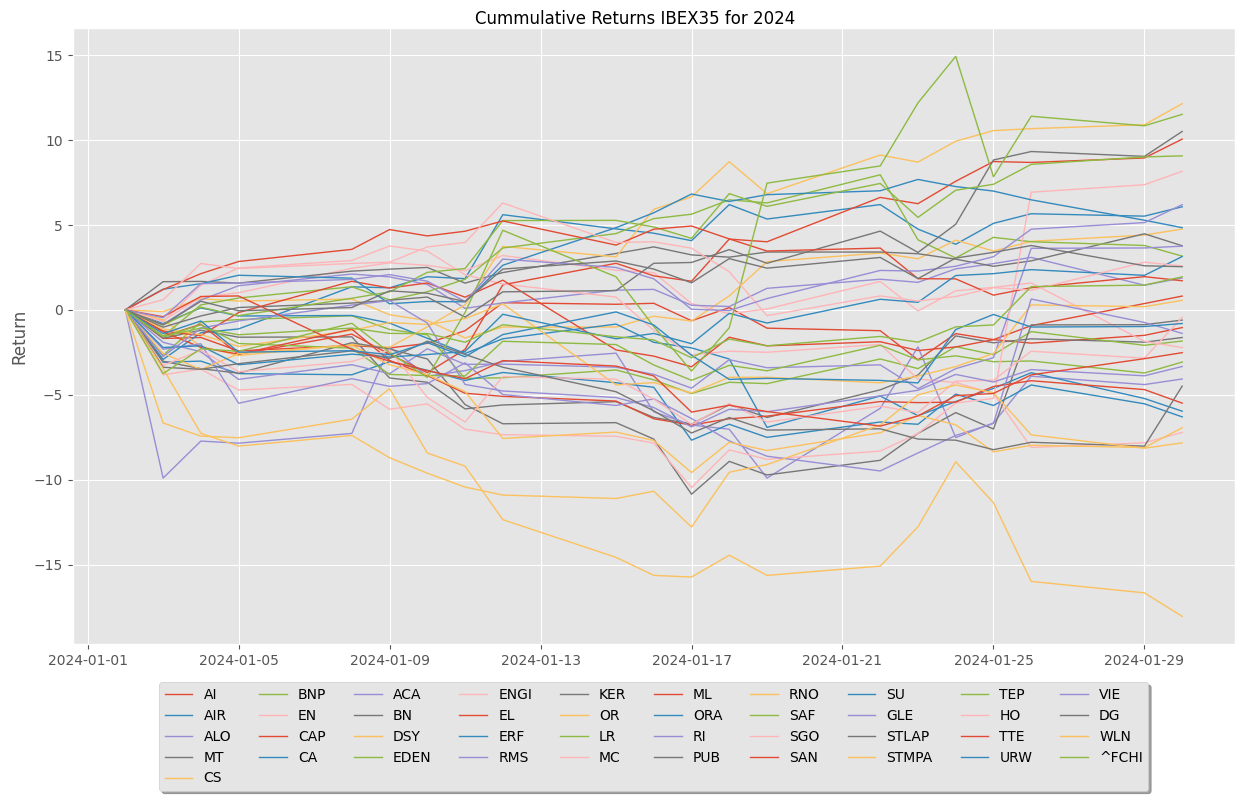

In [33]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(cac40_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [34]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(cac40_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()

100%|██████████| 41/41 [00:00<00:00, 51.95it/s]


In [35]:
# Create also table of cummulative returns
list = []

for stock in tqdm(cac40_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Company']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


100%|██████████| 41/41 [00:00<00:00, 47.25it/s]


,Ticker,Company,Date,Cummulative_Return
0,DSY.PA,Dassault Systèmes,2024-01-30,12.142607
1,TEP.PA,Teleperformance,2024-01-30,11.515372
2,PUB.PA,Publicis,2024-01-30,10.508872
3,CAP.PA,Capgemini,2024-01-30,10.055425
4,SAF.PA,Safran,2024-01-30,9.070467
5,MC.PA,LVMH,2024-01-30,8.160443
6,VIE.PA,Veolia,2024-01-30,6.197184
7,AIR.PA,Airbus,2024-01-30,6.073048
8,ORA.PA,Orange,2024-01-30,4.841788
9,CS.PA,AXA,2024-01-30,4.761107
